In [1]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas_datareader import data as wb
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Getting data

TickerA='^BVSP'
df_ibov= wb.DataReader(TickerA, data_source='yahoo', start='2002-1-1', end = '2020-12-31')['Adj Close']
df_ibov= pd.DataFrame(df_ibov)
df_ibov['simp_return'] = df_ibov['Adj Close'].pct_change()
df_ibov['simp_ret_cum'] = (df_ibov['simp_return'] + 1).cumprod()-1
df_ibov = df_ibov.dropna()
print(df_ibov.describe())

           Adj Close  simp_return  simp_ret_cum
count    4700.000000  4700.000000   4700.000000
mean    53696.962766     0.000617      2.870888
std     24604.158260     0.017835      1.773656
min      8371.000000    -0.147797     -0.396554
25%     37748.750000    -0.008699      1.721219
50%     54578.000000     0.000851      2.934400
75%     66272.000000     0.010486      3.777393
max    119528.000000     0.146560      7.616494


In [4]:
# Sorting by daily returns
df_ibov_descending = df_ibov.sort_values(by=['simp_return'], ascending=False)

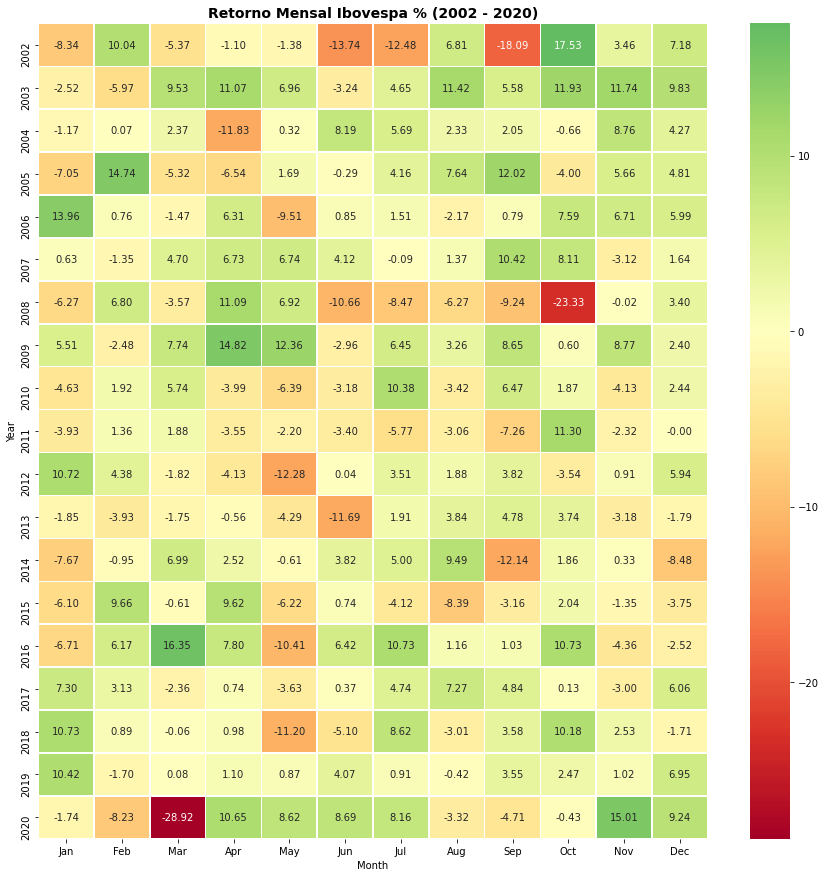

In [60]:
# Heat map

import monthly_returns_heatmap as mrh
retorno = df_ibov['simp_return']
mrh.plot(retorno,figsize= (15,15), title = 'Retorno Mensal Ibovespa % (2002 - 2020)',compounded=False, eoy = False, cmap = "RdYlGn")

 

In [22]:
#Monthly returns
anos = 2020 -2002
retorno_mes = retorno.groupby(retorno.index.month_name()).sum()*100/anos
retorno_mes = pd.DataFrame(retorno_mes).sort_values(by='simp_return', ascending = False)
retorno_mes

,simp_return
Date,
October,3.230541
December,2.882550
April,2.874264
July,2.527346
November,2.411712
February,1.961029
August,1.467414
September,0.721166
March,0.228942


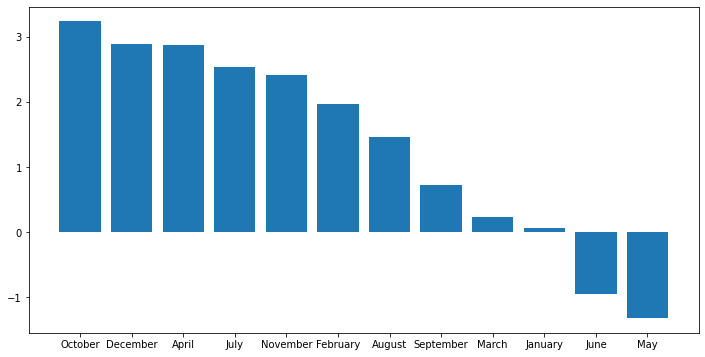

In [59]:
plt.figure(figsize = (12,6))
plt.bar(retorno_mes.index, retorno_mes['simp_return'])
plt.show()



count    4700.000000
mean        0.000617
std         0.017835
min        -0.147797
25%        -0.008699
50%         0.000851
75%         0.010486
max         0.146560
Name: simp_return, dtype: float64


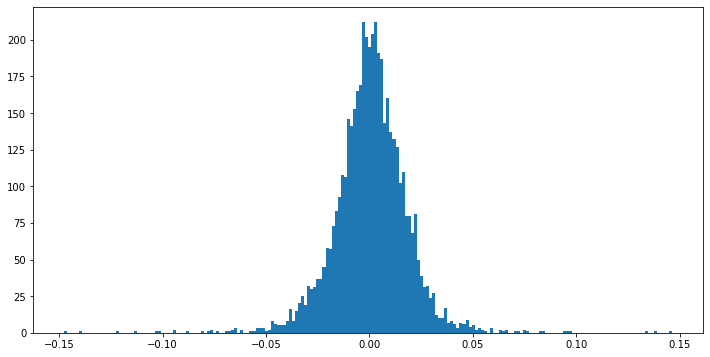

In [73]:
#Frequency Distribution

x = df_ibov['simp_return'].dropna()
print(x.describe())

hist_data = [x]
group_labels = ['Normal']

plt.figure(figsize = (12,6))
plt.hist(hist_data, bins=200)

plt.show()



<AxesSubplot:xlabel='simp_return', ylabel='Density'>

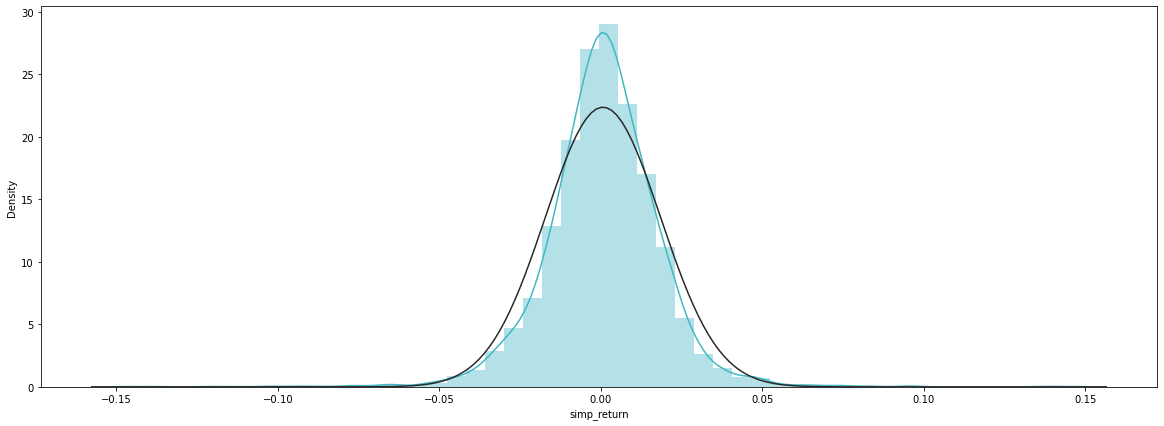

In [79]:
plt.figure(figsize=(20, 7))
sns.distplot(df_ibov['simp_return'], fit=norm, color='#41b6c4',hist=True)

In [88]:
from scipy.stats import normaltest, stats
teste_norm = stats.normaltest(df_ibov['simp_return'])
skew = stats.skew(df_ibov['simp_return'])
kurtosis = stats.kurtosis(df_ibov['simp_return'])
print(teste_norm)
print(f"If <0, left, if > 0, right skewed: SKEW -> {skew}")
print(f"If > 3 dist with fat tails: KURTOSIS -> {kurtosis}")


NormaltestResult(statistic=699.4000815332445, pvalue=1.3402998645900517e-152)
If <0, left, if > 0, right skewed: SKEW -> -0.1625291461758978
If > 3 dist with fat tails: KURTOSIS -> 7.222268074440452
